Test - R2:	0.988
Test - MAE:	0.075
Test - RMSE:	0.097
Test - Adjusted R2:	0.988


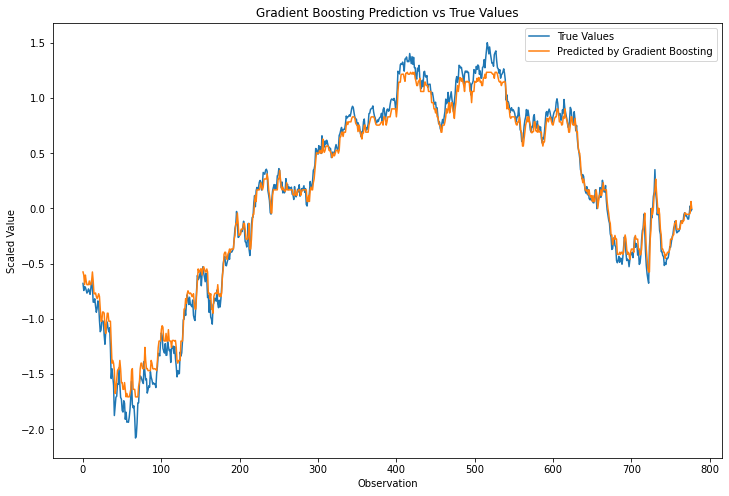

In [11]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import TimeSeriesSplit
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score

# Function to calculate adjusted R2
def adj_r2_score(r2, n, p):
    return 1 - ((1 - r2) * (n - 1) / (n - p - 1))

# Loading dataset
exchange_data = pd.read_csv('EURUSD.csv')
exchange_data["Date"] = pd.to_datetime(exchange_data["Date"])
ind_exchange_data = exchange_data.set_index(["Date"], drop=True)

# Sorting data in ascending order
data_frame = ind_exchange_data.sort_index(axis=1, ascending=True)
data_frame = data_frame.iloc[::-1]
df = data_frame[["close"]]

# Splitting data into train and test sets
split_date = pd.Timestamp('01-01-2021')
train = df.loc[:split_date]
test = df.loc[split_date:]

# Standardizing data
sc = StandardScaler()
train_sc = sc.fit_transform(train)
test_sc = sc.transform(test)

# Creating features and labels
X = np.concatenate((train_sc[:-1], test_sc[:-1]))
y = np.concatenate((train_sc[1:].ravel(), test_sc[1:].ravel()))

tscv = TimeSeriesSplit(n_splits=5)

# Training model
gb_model = GradientBoostingRegressor(n_estimators=50, learning_rate=0.05, max_depth=3, random_state=42)

cross_val_scores = cross_val_score(gb_model, X, y, cv=tscv, scoring='r2')

gb_model.fit(X, y)
y_pred = gb_model.predict(X)

# Calculating evaluation metrics
rmse = np.sqrt(mse)

print("Test - R2:\t{:0.3f}".format(r2_score(y, y_pred)))
r2_test = r2_score(y, y_pred)
print("Test - MAE:\t{:0.3f}".format(mean_absolute_error(y, y_pred)))
print("Test - RMSE:\t{:0.3f}".format(rmse))
print("Test - Adjusted R2:\t{:0.3f}".format(adj_r2_score(r2_test, X.shape[0], X.shape[1])))

# Plotting true vs predicted values
plt.figure(figsize=(12, 8))
plt.plot(y, label='True Values')
plt.plot(y_pred, label='Predicted by Gradient Boosting')
plt.title("Gradient Boosting Prediction vs True Values")
plt.xlabel('Observation')
plt.ylabel('Scaled Value')
plt.legend()
plt.show()